<a href="https://colab.research.google.com/github/Rockydedhia/Python_For_DataScience/blob/master/Assignment_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.reset_option('display.min_columns')
import seaborn as sns


In [72]:
y = pd.read_csv(r'/content/playstore-analysis (2) (1).csv')
y.iloc[4453]
y.shape

(10841, 13)

## Task 1##

__Data Clean Up - Missing Value treatment___

__(1.a) Dropping records where Ratting is missing since Rating is our Target or Study Variable__

In [73]:
print("Checking For Missing Values in Rating Column are -",y['Rating'].isnull().sum())

print("Dropping all missing values in Rating Column \n")

y.dropna(subset=['Rating'],inplace=True)

print("After Droping Mising values in Rating column are ",y['Rating'].isnull().sum())

y=y.reset_index(drop=True)     
      
      


Checking For Missing Values in Rating Column are - 1474
Dropping all missing values in Rating Column 

After Droping Mising values in Rating column are  0


In [74]:
print("Checking for Null values in Android ver \n")
c=pd.isnull(y['Android Ver'])
y[c]

Checking for Null values in Android ver 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [75]:
y.shape

(9367, 13)

In [76]:
print("Drop the 3rd records ie record for life made wifi\n")
y.drop([9117],inplace=True)

Drop the 3rd records ie record for life made wifi



In [77]:
c=pd.isnull(y['Android Ver'])
y[c]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [78]:
y.shape

(9366, 13)

In [79]:
y.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,FAMILY,4.4,2,21516.529524,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up


In [80]:
print("Checking for Null values in Android Ver is ",y['Android Ver'].isnull().sum())


Checking for Null values in Android Ver is  2


In [81]:
print("Replacing with mode")
y['Android Ver'].fillna(y['Android Ver'].mode()[0],inplace=True)


Replacing with mode


In [82]:
print("Now there is no Null values now ",y['Android Ver'].isnull().sum())


Now there is no Null values now  0


In [83]:
print("Checking for null values in Current Ver")
c=pd.isnull(y['Current Ver'])
y[c]

Checking for null values in Current Ver


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1473,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5866,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6578,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [84]:
print("Converted nan values into mode of Current Ver")

y['Current Ver'].fillna(y['Current Ver'].mode()[0],inplace=True)



Converted nan values into mode of Current Ver


## 2 Data Clean Up ##



__Which all variables need to be brought to numeric types?__

In [85]:
print(" Review, Installs, Price columns can be Brought to Numeric") 

 Review, Installs, Price columns can be Brought to Numeric


__Price variable – remove $ sign and convert to float__

In [0]:
y['Price'] = y['Price'].str.strip("$")

In [87]:
print("Checking wheter $ Removed ")
y.loc[y['App'] == '[substratum] Vacuum: P']


Checking wheter $ Removed 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


__c. Installs – remove ‘,’ and ‘+’ sign, convert to integer__


In [0]:
y['Installs'] = y['Installs'].str.replace('\W',"")

In [89]:
print("Checking wheter + , Removed in Installs column")
y.loc[y['App'] == '[substratum] Vacuum: P']

Checking wheter + , Removed in Installs column


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


__Convert all Identified Column to Numeric__



In [90]:
y['Price']=pd.to_numeric(y['Price'],errors='coerce')
y[['Reviews','Size']]=y[['Reviews','Size']].apply(pd.to_numeric,downcast='integer')
print("Converted required columns to Numeric")
y.dtypes




Converted required columns to Numeric


App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

__3 Task__


__Avg rating should be betwwen 1 and 5 as only these values are allowed on the play store__

In [91]:
y=y[y['Rating'].between(1,5)]
print("As there is value between (1,5)\n",y["Rating"])



As there is value between (1,5)
 0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9362    4.0
9363    4.5
9364    5.0
9365    4.5
9366    4.5
Name: Rating, Length: 9366, dtype: float64


__Reviews Should not be more than installs as only those who installed can review the app__


__i. Are there any such records? Drop if so__

In [92]:
y['Installs']=y['Installs'].apply(pd.to_numeric,downcast='integer')

y=y[y['Reviews']<y['Installs']]
print(y[['App','Reviews','Installs']])


                                                    App  Reviews  Installs
0        Photo Editor & Candy Camera & Grid & ScrapBook      159     10000
1                                   Coloring book moana      967    500000
2     U Launcher Lite – FREE Live Cool Themes, Hide ...    87510   5000000
3                                 Sketch - Draw & Paint   215644  50000000
4                 Pixel Draw - Number Art Coloring Book      967    100000
...                                                 ...      ...       ...
9362                                      FR Calculator        7       500
9363                                   Sya9a Maroc - FR       38      5000
9364                   Fr. Mike Schmitz Audio Teachings        4       100
9365                      The SCP Foundation DB fr nn5n      114      1000
9366      iHoroscope - 2018 Daily Horoscope & Astrology   398307  10000000

[9357 rows x 3 columns]


__4. Identify and handle outliers__

__Price Column__

__i. Make suitable plot to identify outliers in price__


Ploting Boxplot graph for Price column


<function matplotlib.pyplot.show>

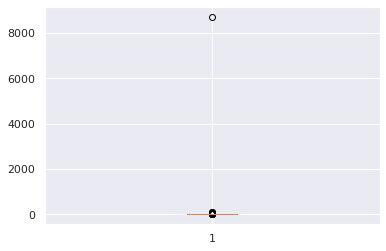

In [93]:
print("Ploting Boxplot graph for Price column")

plt.boxplot(y['Price'].value_counts())
plt.show

__ii. Do you expect apps on the play store to cost $200? Check out these cases__


In [94]:
y=y[y['Price']<200]
print(y['Price'].unique())
print('Now the Price is less than $200')



[ 0.    4.99  3.99  6.99  7.99  5.99  2.99  3.49  1.99  9.99  7.49  0.99
  9.    5.49 10.   24.99 11.99 79.99 16.99 14.99 29.99 12.99  2.49 10.99
  1.5  19.99 15.99 33.99 39.99  3.95  4.49  1.7   8.99  1.49  3.88 17.99
  3.02  1.76  4.84  4.77  1.61  2.5   1.59  6.49  1.29 37.99 18.99  8.49
  1.75 14.    2.    3.08  2.59 19.4   3.9   4.59 15.46  3.04 13.99  4.29
  3.28  4.6   1.    2.95  2.9   1.97  2.56  1.2 ]
Now the Price is less than $200


__After dropping the useless records, make the suitable plot again to identify
outliers__

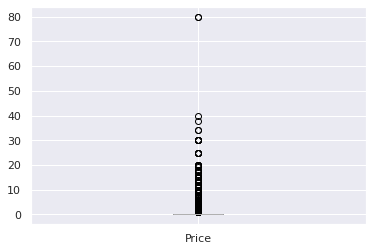

In [95]:
y.boxplot(column="Price")

__iii. After dropping the useless records, make the suitable plot again to identify
outliers__

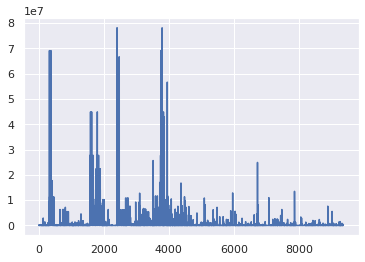

In [96]:
# Make suitable plot

y['Reviews'].plot(kind='line')

__iv. Limit data to records with price < $30__


In [97]:
y=y[y['Price']<30]
print(y['Price'].unique())
print('Now the Price is less than $30')



[ 0.    4.99  3.99  6.99  7.99  5.99  2.99  3.49  1.99  9.99  7.49  0.99
  9.    5.49 10.   24.99 11.99 16.99 14.99 29.99 12.99  2.49 10.99  1.5
 19.99 15.99  3.95  4.49  1.7   8.99  1.49  3.88 17.99  3.02  1.76  4.84
  4.77  1.61  2.5   1.59  6.49  1.29 18.99  8.49  1.75 14.    2.    3.08
  2.59 19.4   3.9   4.59 15.46  3.04 13.99  4.29  3.28  4.6   1.    2.95
  2.9   1.97  2.56  1.2 ]
Now the Price is less than $30


__ii. Limit data to apps with < 1 Million reviews__

In [98]:
y[['Reviews']]=y[['Reviews']].apply(pd.to_numeric,downcast='integer')

y=y[y['Reviews']<1000000]
y['Reviews'].unique()



array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int32)

__c. Installs__

__i. What is the 95th percentile of the installs?__

In [99]:
#  Percentile of Installs Column

p_I=y['Installs'].quantile(.95)
print("95Percentile of Installs column is ",p_I)


95Percentile of Installs column is  10000000.0


In [100]:
y.shape

(8632, 13)

__Drop records having a value more than the 95th percentile__



In [101]:
#y['Installs']=y['Installs'].apply(pd.to_numeric,errors='coerce')

#y.Installs.quantile(0.95)
y=y[y['Installs']<p_I]
y.shape


(7256, 13)

In [102]:
y['Installs'].unique()


array([  10000,  500000, 5000000,  100000,   50000, 1000000,    5000,
          1000,     100,     500,      10,       5,      50])

In [0]:
y = y.reset_index(drop=True)

# Data analysis to answer business questions

__5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?__


array([4.1, 3.9, 4.7, 4.3, 4.4, 3.8, 4.6, 3.2, 4.5, 4. , 4.8, 4.2, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

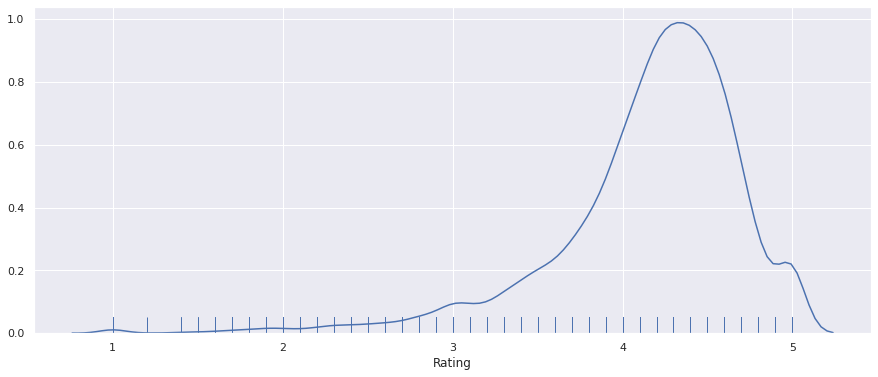

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.subplots(figsize=(15,6))
sns.distplot(y["Rating"], hist=False, rug=True)
y["Rating"].unique()


__a. How do you explain this?__

>__As Shown in Above Graph most of the User rated the App within 4.2 to 4.6 rating Compared with (1,5) Rating Size__

__b. What is the implication of this on your analysis?__
>__Most of the App which comes under Rating 4.2 to 4.6 has good Customer Reviews & Others which are less than 4.2 must Improve their App.__

In [105]:
y['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [106]:
y.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


__6. What are the top Content Rating values?__

In [107]:
y['Content Rating'].value_counts()

Everyone           5911
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

__a. Are there any values with very few records?__
>__Yes there are recors with few Values Example:- (Adults only 18+ :3) ,(Unrated: 1)__


__b. If yes, drop those as they won’t help in the analysis__

In [0]:
y.drop(y[y['Content Rating']==("Adults only 18+")].index, inplace = True)
y.drop(y[y['Content Rating']==("Unrated")].index, inplace = True)

In [109]:
y['Content Rating'].value_counts()

Everyone        5911
Teen             746
Mature 17+       346
Everyone 10+     249
Name: Content Rating, dtype: int64

__Now the "Adults only 18+" , "Unrated" Rows has been Removed__

In [110]:
y = y.reset_index(drop=True)
y.shape

(7252, 13)

## 7. Effect of size on rating
__a. Make a joinplot to understand the effect of size on rating__

<Figure size 5040x360 with 0 Axes>

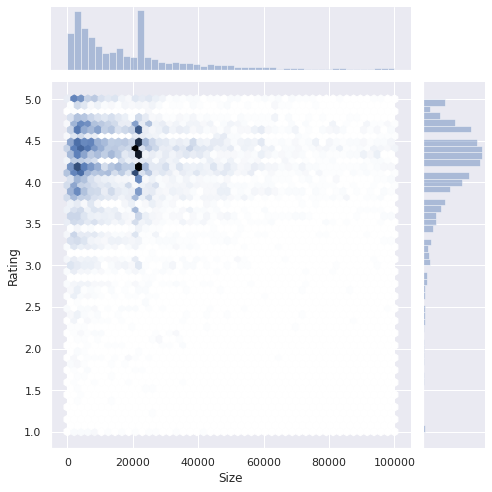

In [111]:
plt.figure(figsize=(70,5))
sns.jointplot("Size", "Rating", data=y, kind="hex",height=7);

__b. Do you see any patterns?__

>__Yes there are some Patterns__

__c. How do you explain the pattern?__

>__Starting from Range ( 200 to 3000 )Size of App Customer Rate App with 4.0 to 5 and the App Size 20000 Most or More of People Rate App with 4.0 to 4.5__


In [112]:
y[y['Price']>0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
189,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
190,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
238,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
239,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
301,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,Fruit Ninja Classic,GAME,4.3,85468,36000.000000,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
7161,FO Bixby,PERSONALIZATION,5.0,5,861.000000,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
7200,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.000000,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
7213,Trine 2: Complete Story,GAME,3.8,252,11000.000000,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


__8. Effect of price on rating__

---



>__a. Make a jointplot (with regression line)__

In [0]:
y['Price']=y['Price'].astype('int32')

In [114]:
y.shape

(7252, 13)

<Figure size 3600x360 with 0 Axes>

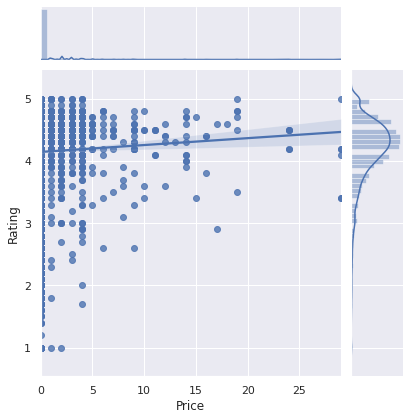

In [115]:

plt.figure(figsize=(50,5))
sns.jointplot(x="Price", y="Rating", data=y, kind="reg");

#d. Replot the data, this time with only records with price > 0


In [126]:
y=y[y['Price']>0]
print(y)

                                                App  ...         Android Ver
189   TurboScan: scan documents and receipts in PDF  ...          4.0 and up
190                  Tiny Scanner Pro: PDF Doc Scan  ...          3.0 and up
238   TurboScan: scan documents and receipts in PDF  ...          4.0 and up
239                  Tiny Scanner Pro: PDF Doc Scan  ...          3.0 and up
301                              Puffin Browser Pro  ...          4.1 and up
...                                             ...  ...                 ...
7134                   Football Manager Mobile 2018  ...          4.1 and up
7151                                     Solitaire+  ...  Varies with device
7200                                Fast Tract Diet  ...          4.2 and up
7213                        Trine 2: Complete Story  ...          5.0 and up
7215                                   sugar, sugar  ...          2.3 and up

[515 rows x 13 columns]


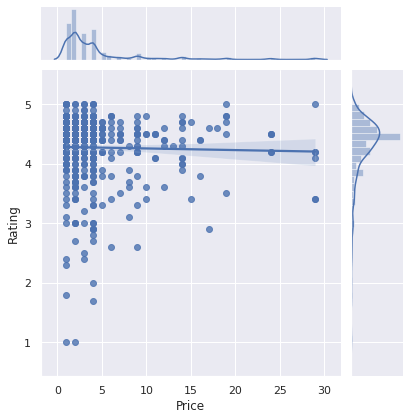

In [125]:
sns.jointplot(x="Price", y="Rating", data=y, kind="reg");

#e. Does the pattern change?
>__Yes Pattern changes because in price column '0' values are more then 6000+__

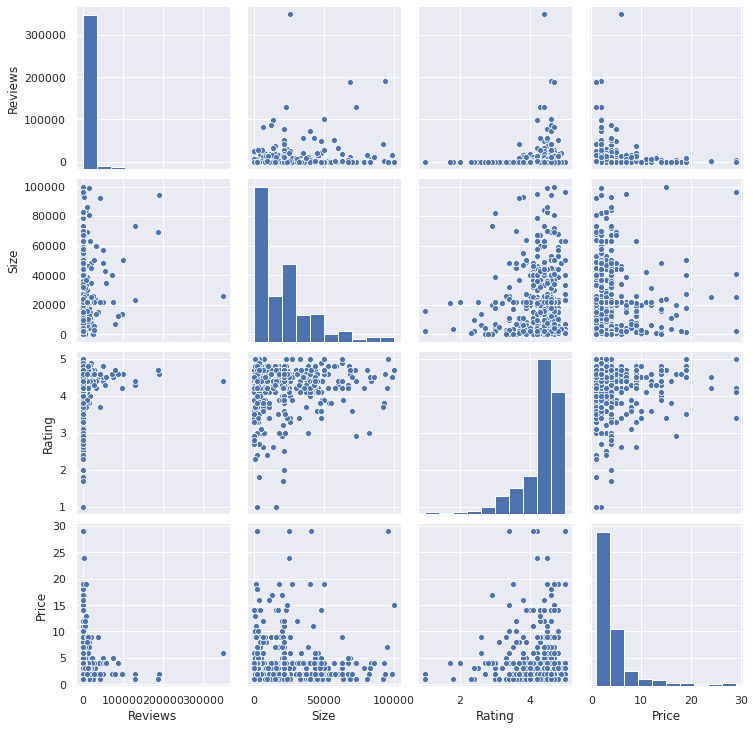

In [127]:
pp = sns.pairplot(data=y,
                  y_vars=['Reviews','Size', 'Rating', 'Price'],
                  x_vars=['Reviews','Size', 'Rating', 'Price'])

In [128]:
y['Content Rating'].value_counts()

Everyone        440
Teen             36
Everyone 10+     25
Mature 17+       14
Name: Content Rating, dtype: int64

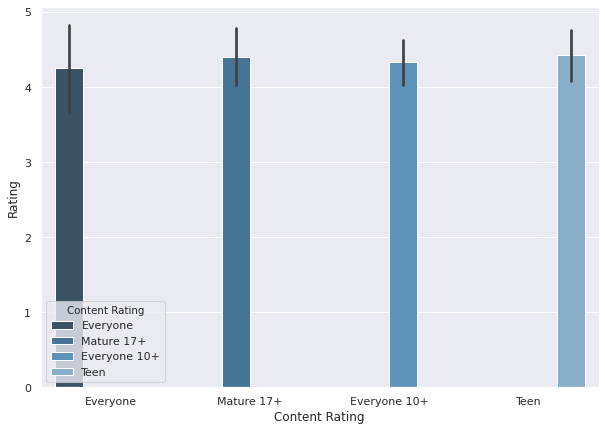

In [129]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.set(style="darkgrid")

ax = sns.barplot(x="Content Rating", y="Rating",palette="Blues_d",hue="Content Rating", ci="sd",data=y)

In [0]:
y['Size']=y['Size'].astype('int32')

In [209]:
y.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int64
Type               object
Price               int32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

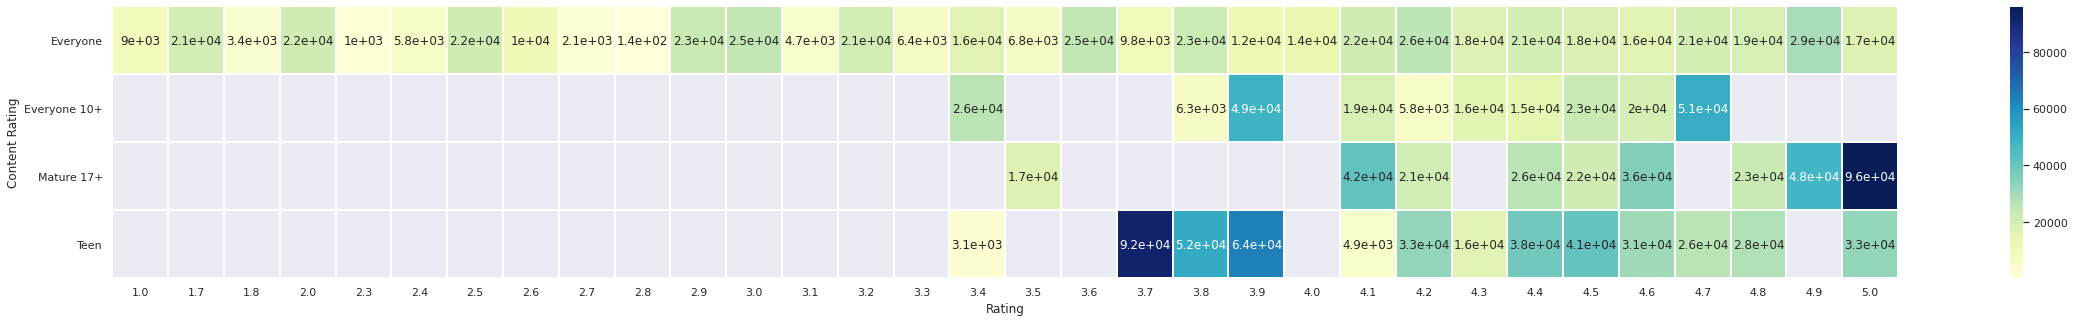

In [222]:
fig_dims = (40, 5)
fig, ax = plt.subplots(figsize=fig_dims)
#df_heatmap.head(10)
df_heatmap = y.pivot_table(values='Size',index='Content Rating',columns='Rating')
#df_heatmap.head(10)
sns.heatmap(df_heatmap,annot=True,cmap='YlGnBu',linewidths=1)

plt.show()

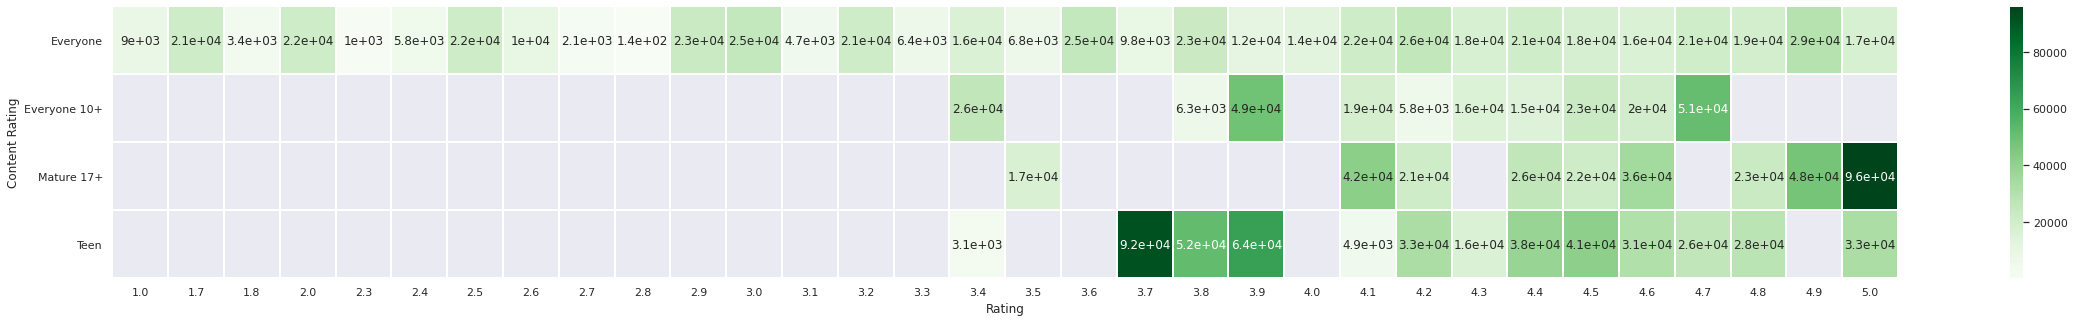

In [213]:
fig_dims = (40, 5)
fig, ax = plt.subplots(figsize=fig_dims)
#df_heatmap.head(10)
df_heatmap = y.pivot_table(values='Size',index='Content Rating',columns='Rating')
#df_heatmap.head(10)
sns.heatmap(df_heatmap,annot=True,cmap='Greens',linewidths=1)

plt.show()

In [207]:
y['Size'].unique()

array([  6800,  39000,  21516,   6200,  17000,  63000,  44000,  24000,
        53000,   2300,  29000,  35000,  48000,  84000,  15000,  69000,
        46000,  33000,  79000,  60000,  82000,   6900,  11000,   3500,
        67000,  26000,  72000,  37000,   1200,  12000,  83000,   9500,
        23000,   2900,  25000,  20000,  21000,   5400,  42000,   1800,
         3800,   5800,  19000,   5000,    862,   9900,   2400,    899,
        38000,   6500,  14000,    378,  22000,    266,    375,   2800,
        95000,   2600,   4600,   5100,   8400,  18000,  41000, 100000,
         5900,   6300,   8600,  64000,   7700,     58,  16000,    196,
         8100,   3400,   6100,   1600,    857,   1500,     51,  13000,
         8900,   6400,   9100,  34000,  59000,   3300,  32000,  49000,
        40000,  47000,   1300,    313,   5200,   4500,   4300,   3600,
         3900,   4900,  57000,  93000,     26,   2700,   3700,   7900,
         4200,   8500,   2000,  68000,   8300,  92000,   4400,   4100,
      